# Problem

 Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. 
Loan Prediction is very common real life problem that each retail bank faces  atleast  once in its lifetime. If done correctly it can save a lot of man hours at the end of retail banks.

There are altogether 13 columns in our data set. Of them Loan Status is the response variable and rest all are the variables /factors that decide the approval of the loan or not.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

In [2]:
df=pd.read_csv("D:\\Msc Case study & Projects\\Loan prediction project\\loandata.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Train Categorical Variables Missisng values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df ['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)


# Train Numerical Variables Missing Values
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [7]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df_copy=df.copy()

In [9]:
gender=pd.crosstab(df['Gender'],df_copy['Loan_Status']) 
gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


In [10]:
area=pd.crosstab(df['Property_Area'],df_copy['Loan_Status']) 
area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [11]:
employed=pd.crosstab(df['Self_Employed'],df_copy['Loan_Status']) 
employed

Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56


In [12]:
education=pd.crosstab(df['Education'],df_copy['Loan_Status']) 
education

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [13]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
# normalise can be set to true to print proportion instead of number
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

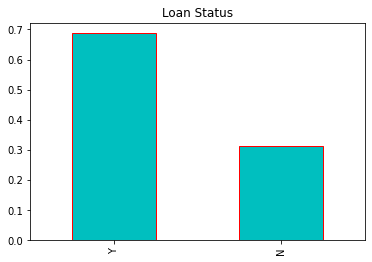

In [15]:
df['Loan_Status'].value_counts(normalize=True).plot.bar(title='Loan Status',color='c',edgecolor='r')


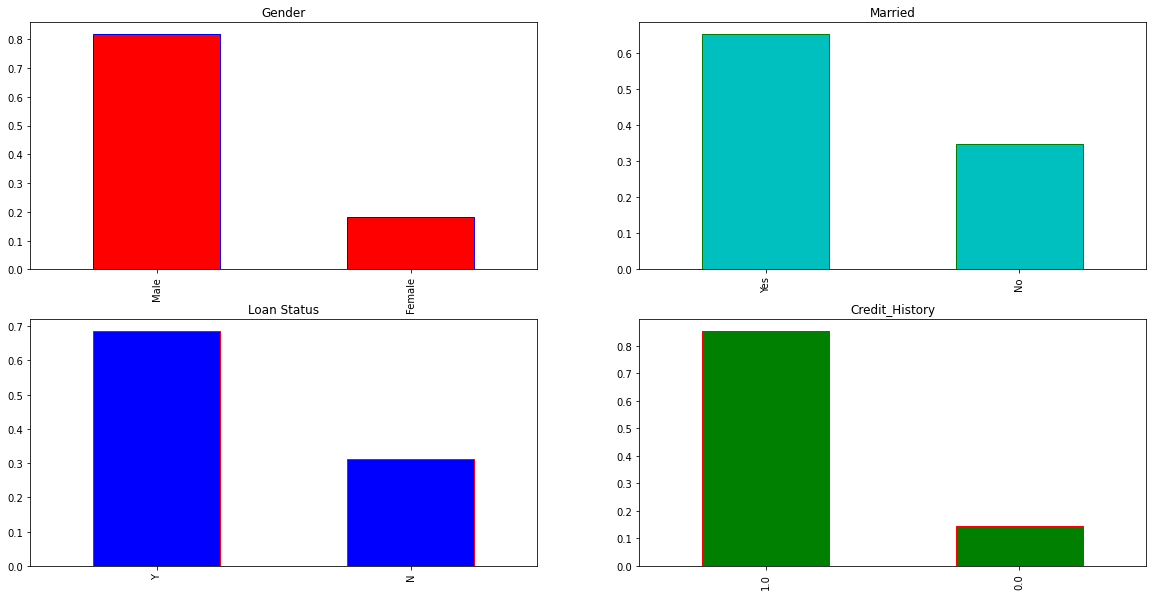

In [16]:
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
df['Gender'].value_counts(normalize=True).plot.bar(title='Gender',color='r',edgecolor='b')

plt.subplot(2,2,2)
df['Married'].value_counts(normalize=True).plot.bar(title='Married',color='c',edgecolor='g')

plt.subplot(2,2,3)
df['Loan_Status'].value_counts(normalize=True).plot.bar(title='Loan Status',color='b',edgecolor='r')

plt.subplot(2,2,4)
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History',color='g',edgecolor='r')



From above bar plots we conclude that.
- 80% applicants in dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% of the applicants in the dataset are self-employed.
- Around 85% of the applicants have repaid their debts.

C:\Users\DELL\Anaconda3\conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


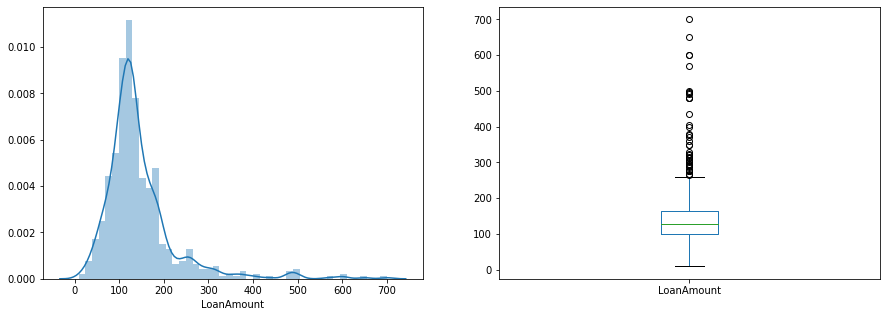

In [17]:
# Distribution of loan amount variable
import seaborn as sns
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df['LoanAmount'])

plt.subplot(1,2,2)
df['LoanAmount'].plot.box()


Text(0, 0.5, 'Percentage')

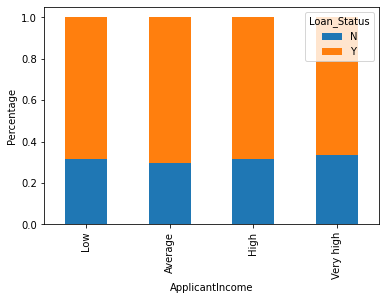

In [18]:
# lets make bins for applicant income variable based on the values in it and analyze the corresponding loan status for each bin.
import pandas as pd
bins=[0,2500,4000,6000,81000]
group = ['Low','Average','High','Very high']
df['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(df['Income_bin'],df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

In [19]:
import pandas as pd
bins=[0,2500,4000,6000,81000]
group = ['Low','Average','High','Very high']
df['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
print(df['Income_bin'])

0           High
1           High
2        Average
3        Average
4           High
         ...    
609      Average
610         High
611    Very high
612    Very high
613         High
Name: Income_bin, Length: 614, dtype: category
Categories (4, object): [Low < Average < High < Very high]


In [20]:
Income_bin=pd.crosstab(df['Income_bin'],df['Loan_Status'])
Income_bin

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
High,45,98
Very high,46,91


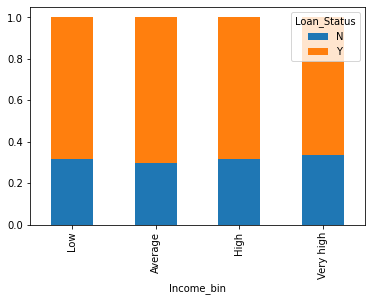

In [21]:
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

It can be reffered that applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assuned that if the applicant income is high the chances of loan approval will also be high.

Text(0, 0.5, 'Percentage')

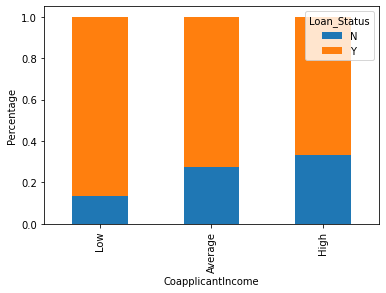

In [23]:
# now analyze the coapplicant income and loan amount variable in same manner
bins=[0,1000,3000,42000]
group = ['Low','Average','High']
df['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(df['Coapplicant_Income_bin'],df['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

It shows that if coapplicant income is less the chances of loan approval are high .But this does not look right.The possible reason behind this may be the most of the applicant dont have any coapplicant so coapplicant income for such applicant is 0 and hence loan approval is not dependent on it.so make new variable in which we will combine the applicants and coapplicants income to visualize the combined effect of loan approval.

Text(0, 0.5, 'Percentage')

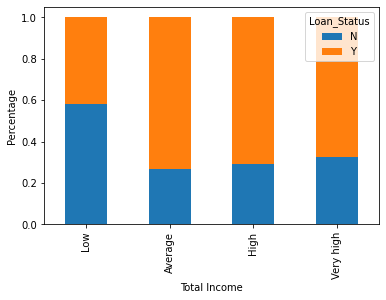

In [24]:
# combine applicant income and coapplicant income and see the combined effects of total incomeon the loan status
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']

bins=[0,2500,4000,6000,81000]
group = ['Low','Average','High','Very high']
df['Total_Income_bin']=pd.cut(df['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(df['Total_Income_bin'],df['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')

We can see that proportion of loans getting approved for applicants having low Total Income is very less as compared to that of applicant with Average,High ,Very high income.

In [25]:
import matplotlib.style as style
%matplotlib inline

In [27]:
df_cols = df[['Gender','Married', 'Dependents', 'Education','Self_Employed','Property_Area','Credit_History']]
df_cols

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History
0,Male,No,0,Graduate,No,Urban,1.0
1,Male,Yes,1,Graduate,No,Rural,1.0
2,Male,Yes,0,Graduate,Yes,Urban,1.0
3,Male,Yes,0,Not Graduate,No,Urban,1.0
4,Male,No,0,Graduate,No,Urban,1.0
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,1.0
610,Male,Yes,3+,Graduate,No,Rural,1.0
611,Male,Yes,1,Graduate,No,Urban,1.0
612,Male,Yes,2,Graduate,No,Urban,1.0


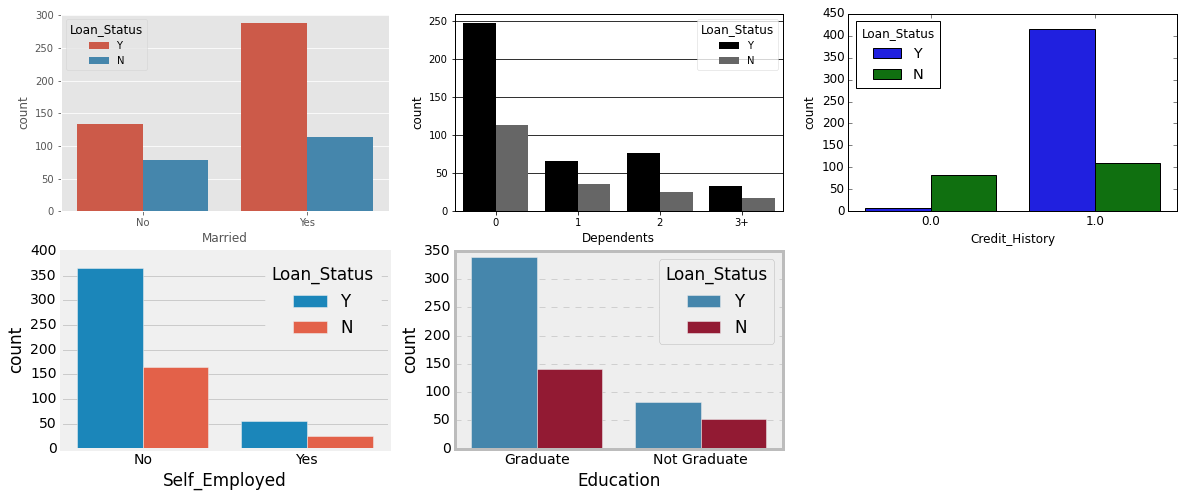

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
style.use('ggplot')
plt.subplot(2,3,1)
sns.countplot(df_cols['Married'],data= df,hue='Loan_Status')

style.use('grayscale')
plt.subplot(2,3,2)
sns.countplot(df_cols['Dependents'],data= df,hue='Loan_Status')

style.use('classic')
plt.subplot(2,3,3)
sns.countplot(df_cols['Credit_History'],data= df,hue='Loan_Status')

style.use('fivethirtyeight')
plt.subplot(2,3,4)
sns.countplot(df_cols['Self_Employed'],data= df,hue='Loan_Status')


style.use('bmh')
plt.subplot(2,3,5)
sns.countplot(df_cols['Education'],data= df,hue='Loan_Status')


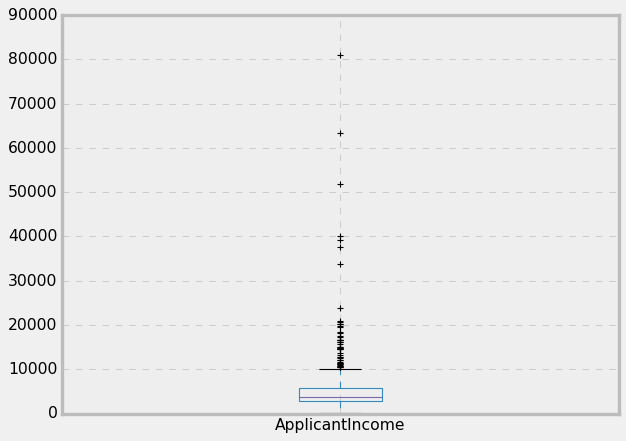

In [29]:
# boxplot of variable ApplicantIncome using training data
df.boxplot(column='ApplicantIncome')

The above boxplot confirm presence of lots of outliers and extereme values.This can be attributed to the income disparity in the society.

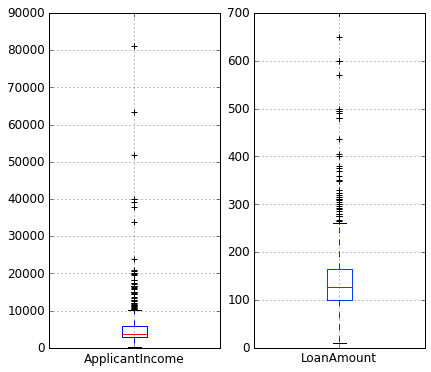

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,6))
style.use('classic')
plt.subplot(1,2,1)
df.boxplot(column='ApplicantIncome')

style.use('seaborn-bright')
plt.subplot(1,2,2)
df.boxplot(column='LoanAmount')

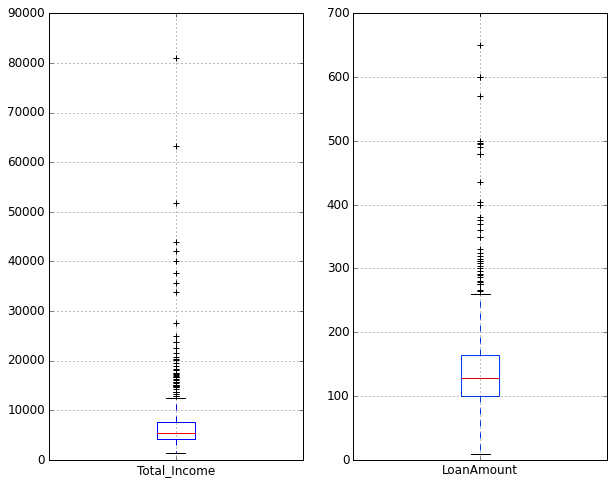

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
style.use('classic')
plt.subplot(1,2,1)
df.boxplot(column='Total_Income')

style.use('seaborn-bright')
plt.subplot(1,2,2)
df.boxplot(column='LoanAmount')

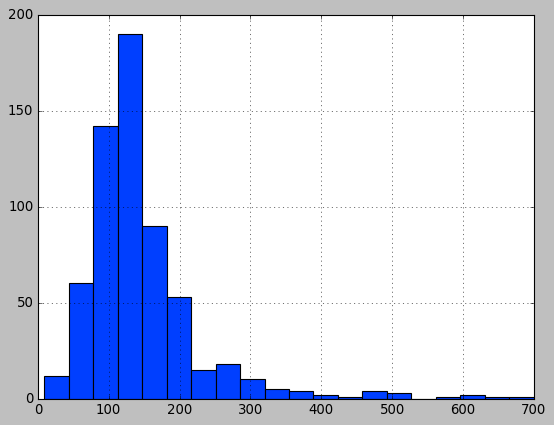

In [33]:
# looking at the distribution of loanamount
df['LoanAmount'].hist(bins=20)

the extreme values are practically possible i.e some people meight apply for high value loans due to specific need .so instead of treating them as outlier.Let's try log transformation to nullify its effect.

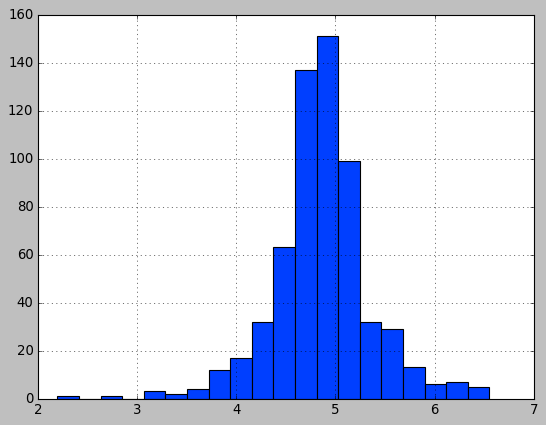

In [34]:
# apply log transformation of loan amount to make it closer to normal
df['LoanAmount_log']=np.log(df['LoanAmount'])

# looking at the distribution of loanamount log
df['LoanAmount_log'].hist(bins=20)


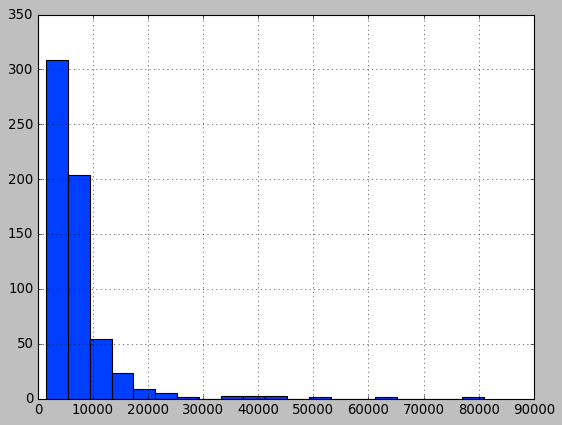

In [35]:
# looking at the distribution of Total_Income
df['Total_Income'].hist(bins=20)

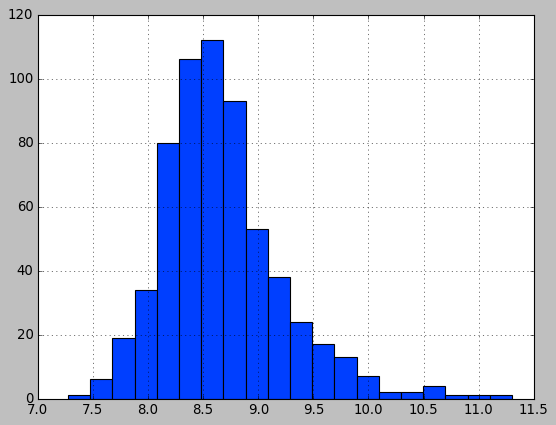

In [36]:
# apply log transformation of totalincome to make it closer to normal
df['TotalIncome_log']=np.log(df['Total_Income'])

# looking at the distribution of totalincome log
df['TotalIncome_log'].hist(bins=20)

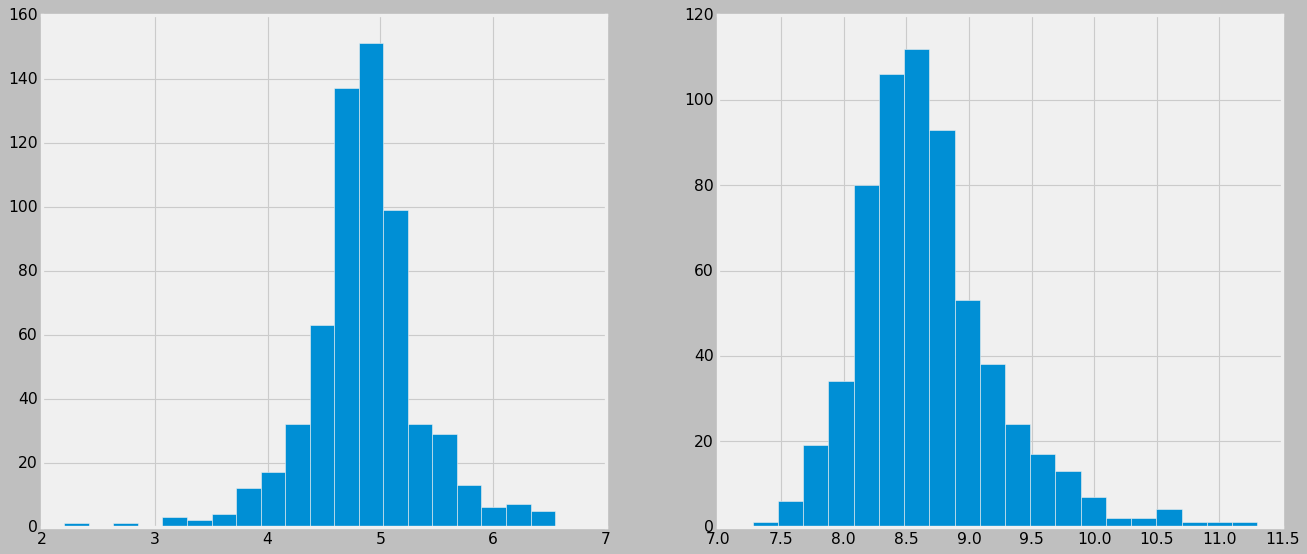

In [37]:
plt.figure(figsize=(20, 8))
style.use('fivethirtyeight')
plt.subplot(1,2,1)
df['LoanAmount_log'].hist(bins=20)


style.use('fivethirtyeight')
plt.subplot(1,2,2)
df['TotalIncome_log'].hist(bins=20)

C:\Users\DELL\Anaconda3\conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


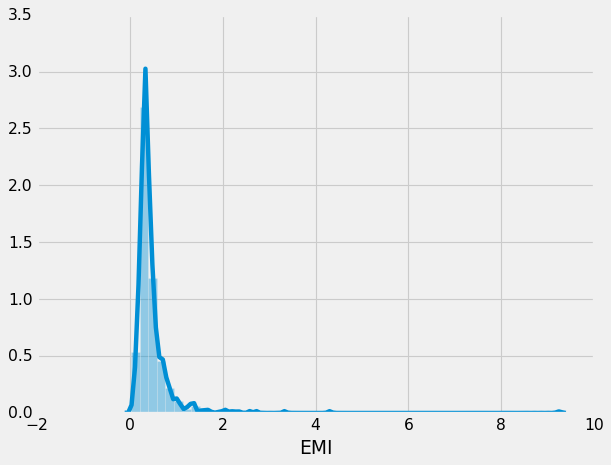

In [38]:
df['EMI']=df['LoanAmount']/df['Loan_Amount_Term']
sns.distplot(df['EMI'])

C:\Users\DELL\Anaconda3\conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


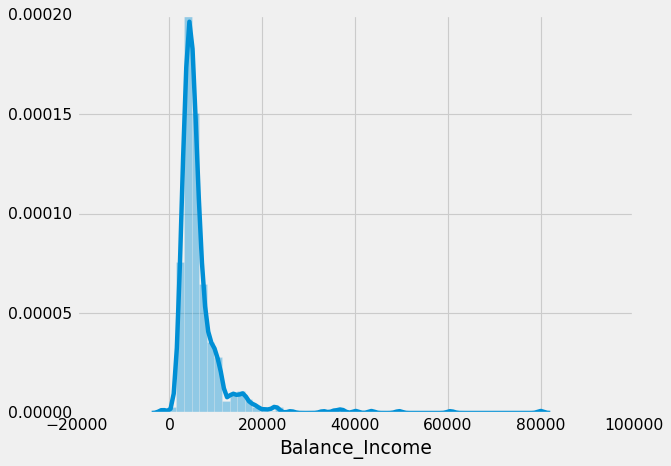

In [39]:
df['Balance_Income']=df['Total_Income']-(df['EMI']*1000)  # multiply 1000 to make units equal
sns.distplot(df['Balance_Income'])

# Correlation Matrix

Text(0.5, 1.0, 'CORRELATION MATRIX - HEATMAP')

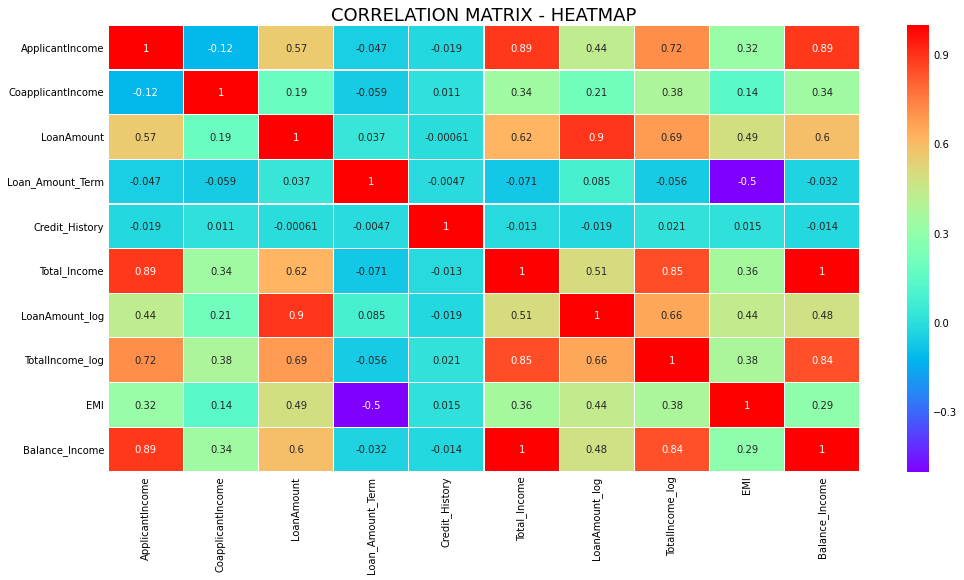

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap="rainbow", annot=True,linewidth=0.1)
plt.title('CORRELATION MATRIX - HEATMAP', size=18)

In [41]:
from sklearn.preprocessing import LabelEncoder
l=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]

for i in l:
    le = LabelEncoder()
    le.fit(df[i])
    le.classes_
    
    df[i]=le.transform(df[i])
    
    
    
    
    
    # Gender  : Male =1 ,Female=0
    # Married : yes = 1 ,  No =0
    # Education : graduate = 0,Not graduate = 1
    # self employed : yes=1  , No=0
    # Property_Area : Urban = 2, Rular =0 ,semiurban = 1
    # Loan_status  :   Yes= 1 ,No = 0

In [42]:
df[["Dependents"]]=df_copy["Dependents"].replace(to_replace={'3+':3})
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,...,2,1,High,NaN,5849.0,High,4.852030,8.674026,0.355556,5493.444444
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,...,0,0,High,Average,6091.0,Very high,4.852030,8.714568,0.355556,5735.444444
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,...,2,1,Average,NaN,3000.0,Average,4.189655,8.006368,0.183333,2816.666667
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,...,2,1,Average,Average,4941.0,High,4.787492,8.505323,0.333333,4607.666667
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,...,2,1,High,NaN,6000.0,High,4.948760,8.699515,0.391667,5608.333333


In [43]:
df=df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Coapplicant_Income_bin','Total_Income','Income_bin','Total_Income_bin'],axis=1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,LP001002,1,0,0,0,0,1.0,2,1,4.852030,8.674026,0.355556,5493.444444
1,LP001003,1,1,1,0,0,1.0,0,0,4.852030,8.714568,0.355556,5735.444444
2,LP001005,1,1,0,0,1,1.0,2,1,4.189655,8.006368,0.183333,2816.666667
3,LP001006,1,1,0,1,0,1.0,2,1,4.787492,8.505323,0.333333,4607.666667
4,LP001008,1,0,0,0,0,1.0,2,1,4.948760,8.699515,0.391667,5608.333333


Text(0.5, 1.0, 'CORRELATION MATRIX - HEATMAP')

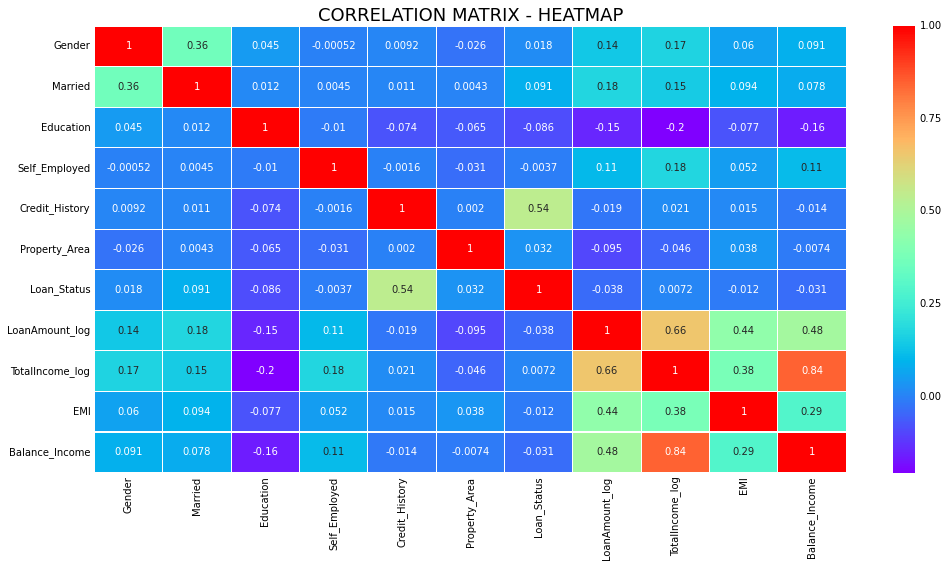

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap="rainbow", annot=True,linewidth=0.1)
plt.title('CORRELATION MATRIX - HEATMAP', size=18)

# Seprate dependent and independent variable

In [45]:
# Separting the Variable into Independent and Dependent 
X = df.drop(["Loan_Status","Loan_ID"],axis=1)
y = df['Loan_Status']


In [47]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,1,0,0,0,0,1.0,2,4.852030,8.674026,0.355556,5493.444444
1,1,1,1,0,0,1.0,0,4.852030,8.714568,0.355556,5735.444444
2,1,1,0,0,1,1.0,2,4.189655,8.006368,0.183333,2816.666667
3,1,1,0,1,0,1.0,2,4.787492,8.505323,0.333333,4607.666667
4,1,0,0,0,0,1.0,2,4.948760,8.699515,0.391667,5608.333333
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,4.262680,7.972466,0.197222,2702.777778
610,1,1,3,0,0,1.0,0,3.688879,8.320205,0.222222,3883.777778
611,1,1,1,0,0,1.0,2,5.533389,9.025456,0.702778,7609.222222
612,1,1,2,0,0,1.0,2,5.231109,8.933664,0.519444,7063.555556


In [48]:
print(X.shape)
print(y.shape)

(614, 11)
(614,)


# Train test split:

In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y,train_size=0.80, test_size = 0.20, random_state =0)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(491, 11)
(491,)
(123, 11)
(123,)


# Decision Tree classifier 

In [50]:
 # Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier 

# create Decision tree classifier object
clf= DecisionTreeClassifier(criterion="entropy",max_depth=3) 

# Train Decision tree classifier
clf=clf.fit(X_train,y_train)

#Predict the response for test data
y_pred= clf.predict(X_test)
print(y_pred)
print(y_pred.shape)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]
(123,)


In [51]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of Decision tree classifier for test data is :",accuracy)


Accuracy of Decision tree classifier for test data is : 0.8211382113821138


In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)


[[14 19]
 [ 3 87]]


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.82      0.97      0.89        90

    accuracy                           0.82       123
   macro avg       0.82      0.70      0.72       123
weighted avg       0.82      0.82      0.80       123



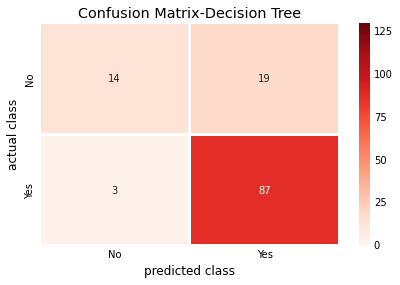

In [54]:
cm =confusion_matrix(y_test,y_pred)
cm=pd.DataFrame(cm)
cm.index=cm.columns=['No','Yes']
sns.heatmap(cm,annot=True,fmt='.0f',vmin=0,vmax=130,linewidths=2,cmap='Reds')
plt.title('Confusion Matrix-Decision Tree')
plt.xlabel('predicted class')
plt.ylabel('actual class')
plt.show()

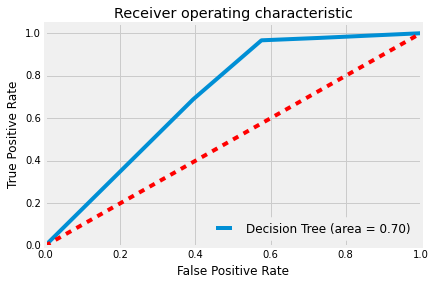

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_DT')
plt.show()

# Random Forest Classifier


In [56]:
from sklearn.ensemble import RandomForestClassifier
# create random forest classifier
rf_model= RandomForestClassifier(n_estimators = 100,random_state=0)

#training the classifier
rf_model.fit(X_train,y_train)

#Applying trained classifier to test
y_pred = rf_model.predict(X_test)


In [57]:
# for train data
#Predict the response for train data
y_pred_t= rf_model.predict(X_train)

In [58]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

cm=confusion_matrix(y_pred,y_test)
print(cm)
print(classification_report(y_pred,y_test))

[[15 10]
 [18 80]]
              precision    recall  f1-score   support

           0       0.45      0.60      0.52        25
           1       0.89      0.82      0.85        98

    accuracy                           0.77       123
   macro avg       0.67      0.71      0.68       123
weighted avg       0.80      0.77      0.78       123



In [59]:
accuracy= accuracy_score(y_pred,y_test)
print("Accuracy of Random Forest Classifier for test data  is :",accuracy)

Accuracy of Random Forest Classifier for test data  is : 0.7723577235772358


In [60]:
accuracy_train=accuracy_score(y_train,y_pred_t)
print("Accuracy of Random Forest classifier for train data is :",accuracy_train)

Accuracy of Random Forest classifier for train data is : 1.0


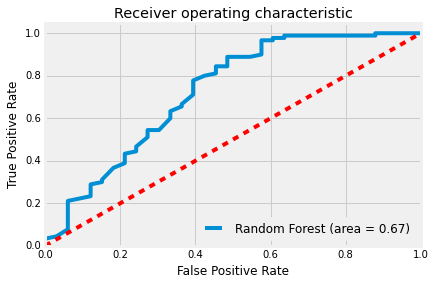

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_RF')
plt.show()

# Naive bayes algorithm


In [81]:
from sklearn.naive_bayes import GaussianNB 
# fit model
nb_model= GaussianNB()

#Train model using training set
nb_model.fit(X_train,y_train)

# Predict response fot test set
y_pred= nb_model.predict(X_test)



In [82]:
# Predict response fot test set
y_pred_t=nb_model.predict(X_train)

In [83]:
#Model Accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy of Naive Bayes Classifier for test data is :",metrics.accuracy_score(y_test,y_pred))

Accuracy of Naive Bayes Classifier for test data is : 0.8292682926829268


In [84]:
accuracy_train=accuracy_score(y_train,y_pred_t)
print("Accuracy of Naive Bayes classifier for train data is :",metrics.accuracy_score(y_train,y_pred_t))

Accuracy of Naive Bayes classifier for train data is : 0.8024439918533605


In [85]:
# implementing the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[15 18]
 [ 3 87]]


In [86]:
# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.45      0.59        33
           1       0.83      0.97      0.89        90

    accuracy                           0.83       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.83      0.83      0.81       123



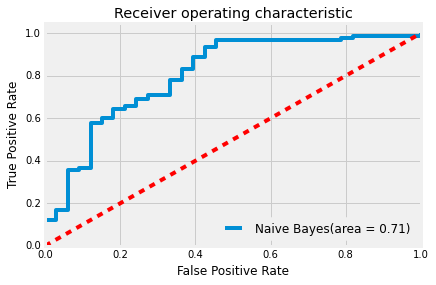

In [87]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, nb_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_NB')
plt.show()

# Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)


print("Accuracy of Logistic Regression for test data is :",metrics.accuracy_score(y_test, predictions))

Accuracy of Logistic Regression for test data is : 0.8292682926829268


In [89]:
predictions_train = model.predict(X_train)


print("Accuracy of Logistic Regression for train data is :",metrics.accuracy_score(y_train, predictions_train))

Accuracy of Logistic Regression for train data is : 0.8044806517311609


In [90]:
# implementing the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
print(cm)


[[14 19]
 [ 2 88]]


In [91]:
# from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



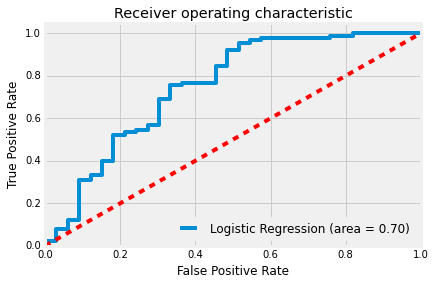

In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [93]:
data = {'Model':  ['Random Forest','Decision Tree','Logistic Regression','Naive Bayes'],
        'Accuracy': [0.7723,0.8211,0.8292,0.8292]}
R = pd.DataFrame (data, columns = ['Model','Accuracy'])

print (R)

                 Model  Accuracy
0        Random Forest    0.7723
1        Decision Tree    0.8211
2  Logistic Regression    0.8292
3          Naive Bayes    0.8292


According to above table, performance of Naïve Bayes model is best for loan prediction than all other classifier model. Similarly Logistic Regression & DT are also better model for loan eligibility approval prediction of applicant.
